In [1]:
!pip install aart

In [2]:
import numpy as np
import aart
from aart import lensingbands as lb
from aart import mkplot
from aart import radialintensity as ri
from aart import raytracing as rt
from aart import visamp as va
from aart import iImages as im
from aart import iMovies as imov
from aart import parameters
import h5py
import matplotlib.pyplot as plt
import scipy
import math
from scipy.optimize import curve_fit
from scipy.ndimage import zoom
from matplotlib.ticker import FormatStrFormatter

In [3]:
import ehtim as eh

Welcome to eht-imaging! v 1.2.7 



In [4]:
bh_obs_data_path='dat/AART/Raytracing/' # Folder for storing the raytracing data
fit_path='dat/AART/Fits/' #Folder for storing the fits
fig_path='dat/AART/Figures/'#Folder for storing the figures

In [5]:
spins=[0.94]
inclinations=[45]

fudge=[1.0]
sub_kep = [1.0]
betar = [1.0]
betaphi = [1.0]

gammap = [-2/2]
sigmap = [3]
mup=[2.0]

limits=20 
dx0=.05
dx1=.05
dx2=limits

In [6]:
params=parameters.generate_dict(spins, inclinations, fudge, mup=mup, sub_kep=sub_kep, betar=betar, 
                                betaphi=betaphi, gammap=gammap, sigmap=sigmap, path=bh_obs_data_path,
                                dx0=dx0,dx1=dx1,dx2=dx2, limits=limits)

In [7]:
%time lb.clb(**params)

Number of points in the n=0 grid  640000
Number of points in the n=1 grid  640000
Number of points in the n=2 grid  4
File  dat/AART/Raytracing/LensingBands_a_0.94_i_45_dx0_0.05_dx1_0.05_dx2_20.h5  created.
CPU times: user 1min 26s, sys: 392 ms, total: 1min 26s
Wall time: 1min 26s


In [8]:
%time rt.raytrace(**params)

Reading file:  dat/AART/Raytracing/LensingBands_a_0.94_i_45_dx0_0.05_dx1_0.05_dx2_20.h5
Analytical ray-tracing of the n=0 band points
Analytical ray-tracing of the n=1 band points
Analytical ray-tracing of the n=2 band points
File  dat/AART/Raytracing/Rays_a_0.94_i_45_bv_0.h5  created.

A total of 1280004 photons were ray-traced
CPU times: user 59.4 s, sys: 388 ms, total: 59.7 s
Wall time: 59.8 s


In [31]:
length = 10

spins = (np.ones(length)*spins[0]).tolist()

fudge = (np.ones(length)*1.0).tolist()
sub_kep = (np.ones(length)*1.0).tolist()
betar = (np.ones(length)*1.0).tolist()
betaphi = (np.ones(length)*1.0).tolist()

gammap = np.round(np.random.uniform(-2, +2, length),2).tolist()
sigmap = np.round(np.random.uniform(0, +3, length),2).tolist()
mup = np.round(np.random.uniform(1, 8, length),2).tolist()

In [32]:
gammap

[-0.42, -1.74, 1.4, 0.29, 1.96, -0.5, 1.92, 0.14, 0.76, 0.24]

In [10]:
params=parameters.generate_dict(spins, inclinations, fudge, mup=mup, sub_kep=sub_kep, betar=betar, 
                                betaphi=betaphi, gammap=gammap, sigmap=sigmap, path=bh_obs_data_path,
                                dx0=dx0,dx1=dx1,dx2=dx2, limits=limits)

In [11]:
%time ri.cintensity(**params)

Reading file:  dat/AART/Raytracing/LensingBands_a_0.94_i_45_dx0_0.05_dx1_0.05_dx2_20.h5
Reading file:  dat/AART/Raytracing/Rays_a_0.94_i_45_bv_0.h5
File  dat/AART/Raytracing/Intensity_a_0.94_i_45_sk_1.0_bphi_1.0_br_1.0_bvapp_0_gfact_3_mp_1.318_gp_-1.907_sp_1.369.h5  created.
Reading file:  dat/AART/Raytracing/LensingBands_a_0.94_i_45_dx0_0.05_dx1_0.05_dx2_20.h5
Reading file:  dat/AART/Raytracing/Rays_a_0.94_i_45_bv_0.h5
File  dat/AART/Raytracing/Intensity_a_0.94_i_45_sk_1.0_bphi_1.0_br_1.0_bvapp_0_gfact_3_mp_6.199_gp_-1.717_sp_2.858.h5  created.
Reading file:  dat/AART/Raytracing/LensingBands_a_0.94_i_45_dx0_0.05_dx1_0.05_dx2_20.h5
Reading file:  dat/AART/Raytracing/Rays_a_0.94_i_45_bv_0.h5
File  dat/AART/Raytracing/Intensity_a_0.94_i_45_sk_1.0_bphi_1.0_br_1.0_bvapp_0_gfact_3_mp_7.802_gp_-1.571_sp_2.642.h5  created.
Reading file:  dat/AART/Raytracing/LensingBands_a_0.94_i_45_dx0_0.05_dx1_0.05_dx2_20.h5
Reading file:  dat/AART/Raytracing/Rays_a_0.94_i_45_bv_0.h5
File  dat/AART/Raytracin

In [12]:
# Distance to the BH in meters (default: M87)
dBH=5.214795112e23  
# BH mass-to-distance ratio (default: 1/psi= 6.2e9 Kg)
psi=1.07473555940836 
#Observer's distance in units of M
D_obs=10000 

Gc=6.67e-11 # G constant [m^3 kg^-1 s^-2]
cc= 2.99792458e8 # c constant [m/s]
Msc=1.988435e30 # Solar Mass [Kg]

MMkg= 6.2e9*psi*Msc # [Kg]
MM=MMkg *Gc/cc**2 # Mass of the BH in meters, i.e., for M87(psi*6.2*10^9) psi ("Best fit") Solar Masses 

# Size of the real image in meters
sizeim_Real=(limits)*MM 
#1 microarcsec in radians
muas_to_rad = np.pi/648000 *1e-6 
fov_Real=np.arctan(sizeim_Real/(dBH))/muas_to_rad #muas

M87_ra = 12.51372
M87_dec = 12.39

In [13]:
for it in range(len(spins)):

    # define filename arrays

    fnrays="./dat/AART/Raytracing/Intensity_a_%s_i_%s_sk_%s_bphi_%s_br_%s_bvapp_0_gfact_3_mp_%s_gp_%s_sp_%s.h5"%(
        spins[it],inclinations[0],sub_kep[it],betaphi[it],betar[it],mup[it],gammap[it],sigmap[it]
    )
    fnFITS_I0="./dat/AART/FITS/I0_a_%s_i_%s_sk_%s_bphi_%s_br_%s_bvapp_0_gfact_3_mp_%s_gp_%s_sp_%s.fits"%(
        spins[it],inclinations[0],sub_kep[it],betaphi[it],betar[it],mup[it],gammap[it],sigmap[it]
    )
    fnFITS_I1="./dat/AART/FITS/I1_a_%s_i_%s_sk_%s_bphi_%s_br_%s_bvapp_0_gfact_3_mp_%s_gp_%s_sp_%s.fits"%(
        spins[it],inclinations[0],sub_kep[it],betaphi[it],betar[it],mup[it],gammap[it],sigmap[it]
    )
    fnFITS_Itot="./dat/AART/FITS/Itot_a_%s_i_%s_sk_%s_bphi_%s_br_%s_bvapp_0_gfact_3_mp_%s_gp_%s_sp_%s.fits"%(
        spins[it],inclinations[0],sub_kep[it],betaphi[it],betar[it],mup[it],gammap[it],sigmap[it]
    )
    
    # import AART files

    h5f = h5py.File(fnrays,'r')

    I0=h5f['bghts0'][:]
    I1=h5f['bghts1'][:]

    h5f.close()

    Itot = I0 + I1

    # produce an ehtim image of I0 and export as FITS

    im0 =  eh.image.make_empty(
        I0.shape[0], 
        2*fov_Real*eh.RADPERUAS, 
        M87_ra, M87_dec, 230e9, 'M87'
    )
    im0.ivec = (I0).flatten()
    im0.save_fits(fnFITS_I0)

    # produce an ehtim image of I1 and export as FITS

    im1 =  eh.image.make_empty(
        I1.shape[0], 
        2*fov_Real*eh.RADPERUAS, 
        M87_ra, M87_dec, 230e9, 'M87'
    )
    im1.ivec = (I1).flatten()
    im1.save_fits(fnFITS_I1)

    # produce an ehtim image of Itot and export as FITS

    imtot =  eh.image.make_empty(
        Itot.shape[0], 
        2*fov_Real*eh.RADPERUAS, 
        M87_ra, M87_dec, 230e9, 'M87'
    )
    imtot.ivec = (Itot).flatten()
    imtot.save_fits(fnFITS_Itot)

In [14]:
len(spins)

10

Reading file:  ./dat/AART/Raytracing/Intensity_a_0.94_i_45_sk_1.0_bphi_1.0_br_1.0_bvapp_0_gfact_3_mp_4.756_gp_-1.441_sp_2.641.h5


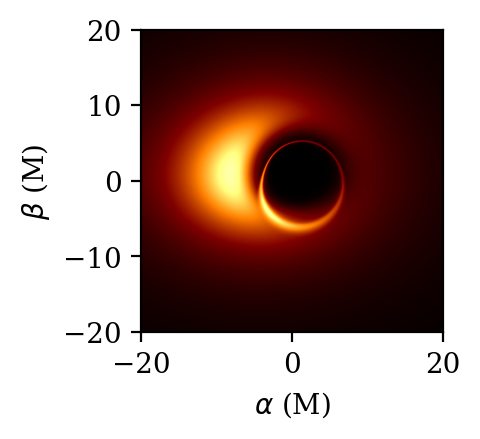

In [24]:
it = np.random.randint(len(spins))

fnrays="./dat/AART/Raytracing/Intensity_a_%s_i_%s_sk_%s_bphi_%s_br_%s_bvapp_0_gfact_3_mp_%s_gp_%s_sp_%s.h5"%(
    spins[it],inclinations[0],sub_kep[it],betaphi[it],betar[it],mup[it],gammap[it],sigmap[it]
)

print("Reading file: ",fnrays)

h5f = h5py.File(fnrays,'r')

I0=h5f['bghts0'][:]
I1=h5f['bghts1'][:]

h5f.close()

lim0=limits
fig, ax = plt.subplots(figsize=[2,2],dpi=200)

ax.imshow(I0+I1,vmax=np.max(I0+I1)*1.2,origin="lower",cmap="afmhot",extent=[-lim0,lim0,-lim0,lim0])

ax.set_xlim(-lim0,lim0)
ax.set_ylim(-lim0,lim0)
    
ax.set_xlabel(r"$\alpha$"+" "+"(M)")
ax.set_ylabel(r"$\beta$"+" "+"(M)")

#plt.savefig('BHImage.png',dpi=200,bbox_inches='tight')

plt.show()

In [16]:
im0.save_fits('./dat/AART/FITS/I0.fits')